## Prodigy Infotech Internship - Task 2: Data cleaning and Exploratory Data Analysis(EDA)

### TASK: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## STEP-1 Import the neccesary libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

## STEP-2 Load the required Data Sets

In [88]:
gender_submission_df = pd.read_csv('gender_submission.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

## STEP-3 Explore the Data Sets

In [89]:
# Display the first few rows of each dataset

print("Gender Submission Data:")
print(gender_submission_df.head(), "\n")

print("Test Data:")
print(test_df.head(), "\n")

print("Train Data:")
print(train_df.head(), "\n")

Gender Submission Data:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1 

Test Data:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN  

In [90]:
# Display the column name of each dataset

print('Gender Submission:' ,gender_submission_df.columns, "\n")
print('Train data', train_df.columns, "\n")
print('Test data', test_df.columns, "\n")

Gender Submission: Index(['PassengerId', 'Survived'], dtype='object') 

Train data Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Test data Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



## STEP-4 Data Cleaning

In [91]:
# Ensure correct column names are being used
print("Train Data Columns:\n")
print(train_df.columns, "\n")

print("Test Data Columns:\n")
print(test_df.columns, "\n")

Train Data Columns:

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Test Data Columns:

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 



# Checking null Values

In [92]:
train_df.isnull().sum()
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### We will handle the missing values for the Age, Embarked, and Fare columns and proceed with the Exploratory Data Analysis (EDA).

In [93]:
# For 'train_df', handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# For 'test_df', handle missing values
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Verify that there are no more missing values
print("Missing values in Train Data after cleaning:")
print(train_df.isnull().sum(), "\n")

print("Missing values in Test Data after cleaning:")
print(test_df.isnull().sum(), "\n")

Missing values in Train Data after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64 

Missing values in Test Data after cleaning:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64 



## STEP-4 Exploratory Data Analysis (EDA)

In [94]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

### Survival rate

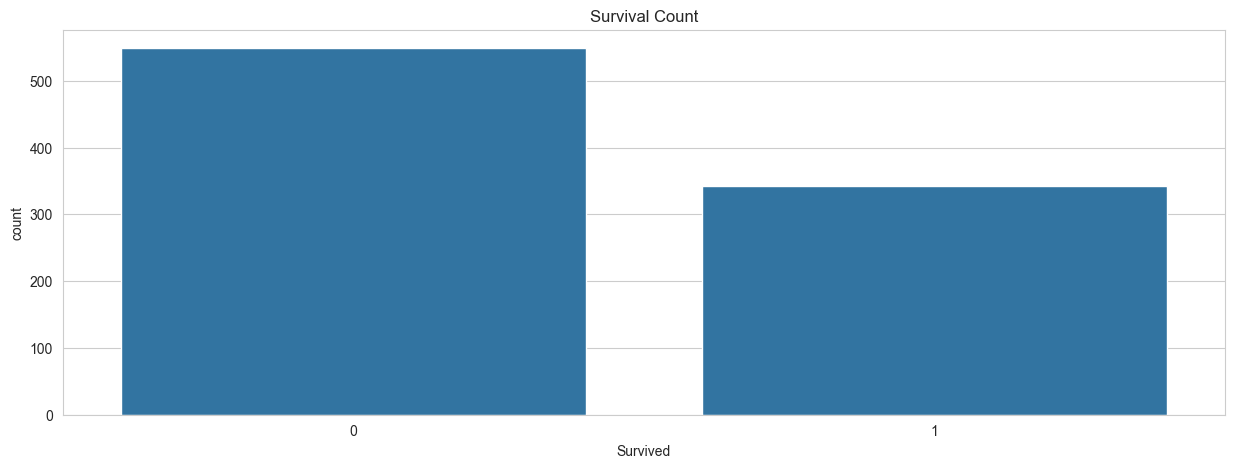

In [95]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

### Passenger class distribution

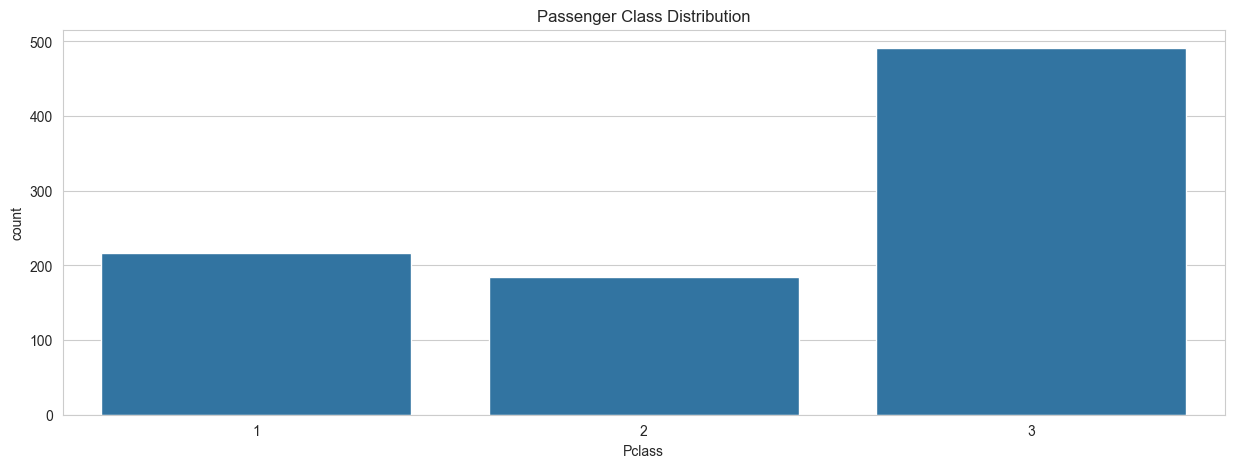

In [96]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Distribution')
plt.show()

### Age distribution

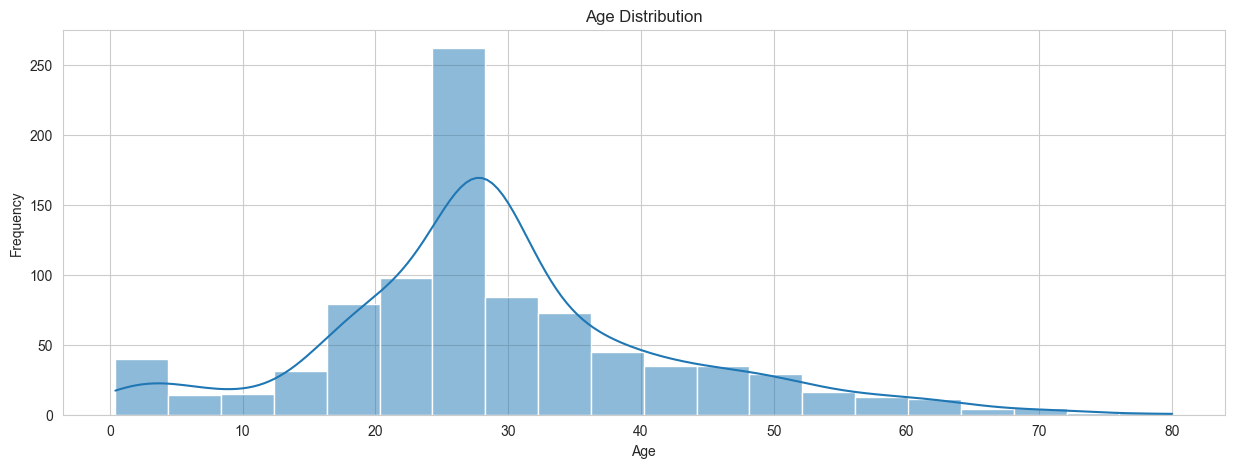

In [97]:
#Histogram
plt.figure(figsize=(15, 5))
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Gender distribution

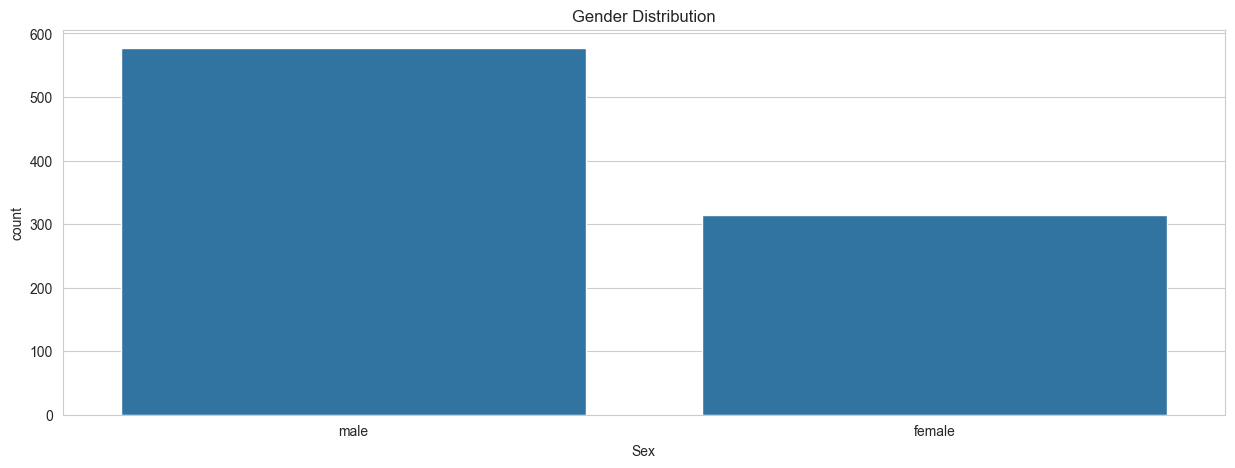

In [98]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Sex', data=train_df)
plt.title('Gender Distribution')
plt.show()

### Embarked port distribution

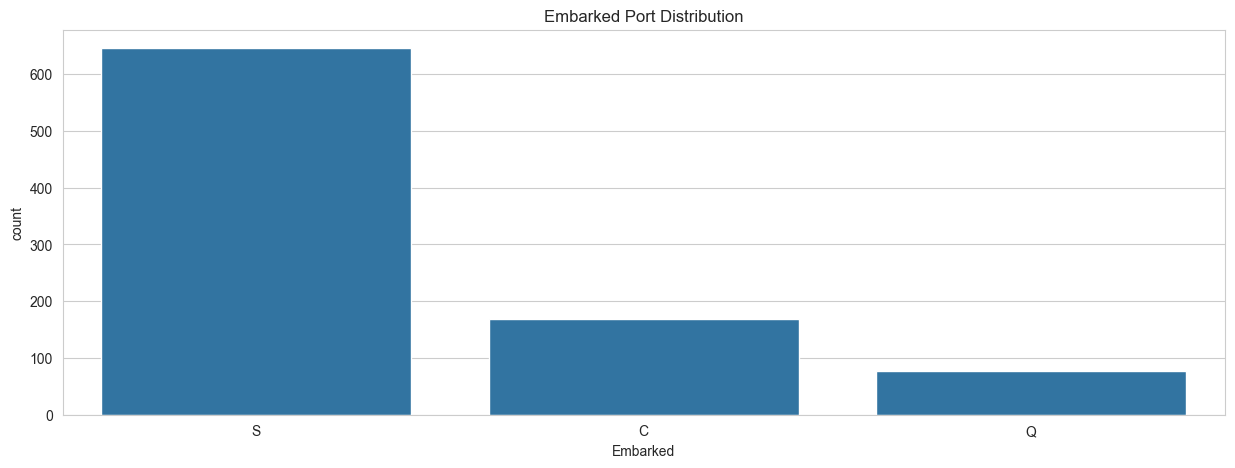

In [99]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Embarked', data=train_df)
plt.title('Embarked Port Distribution')
plt.show()

### Survival rate by passenger class

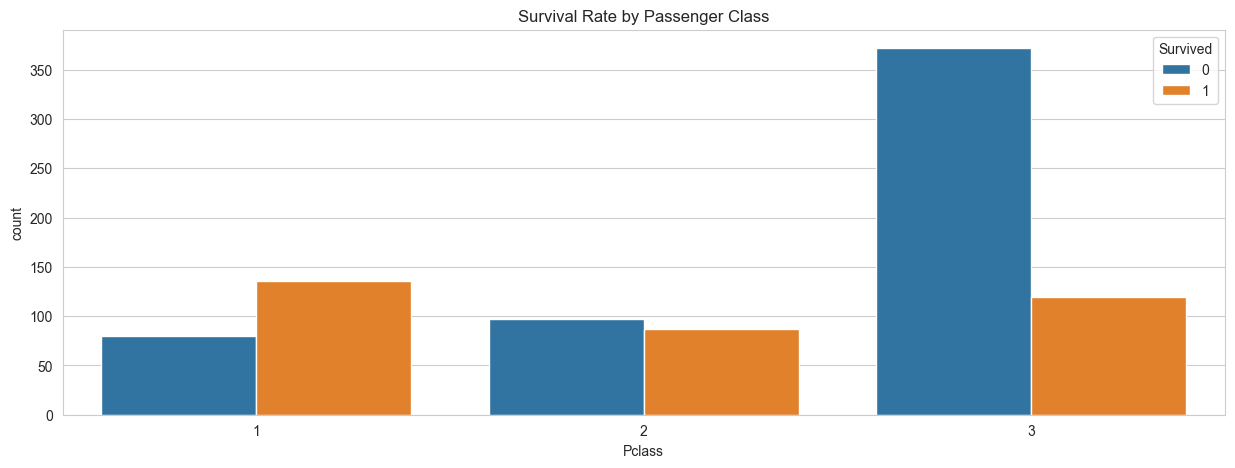

In [100]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

### Survival rate by gender

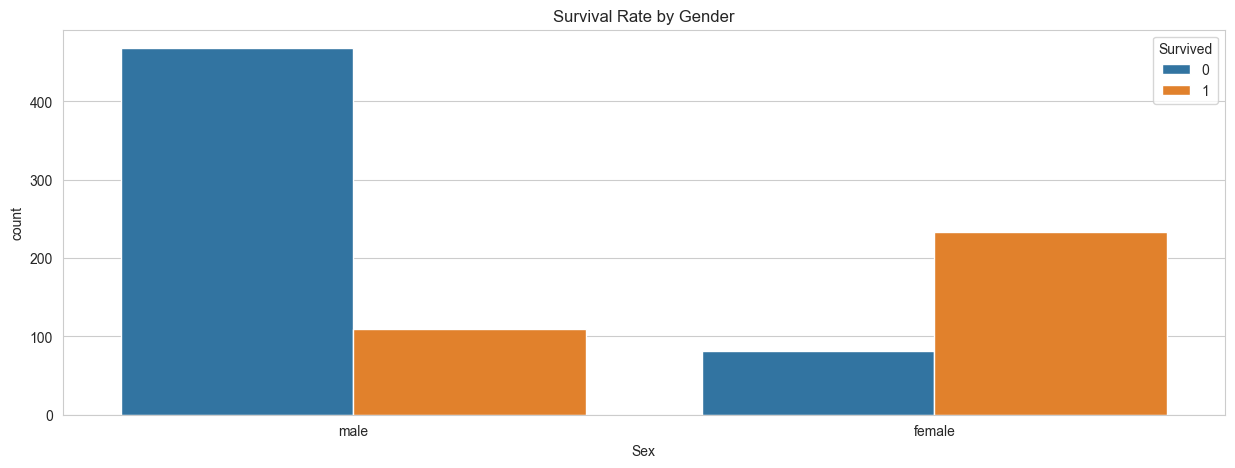

In [101]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

### Survival rate by age

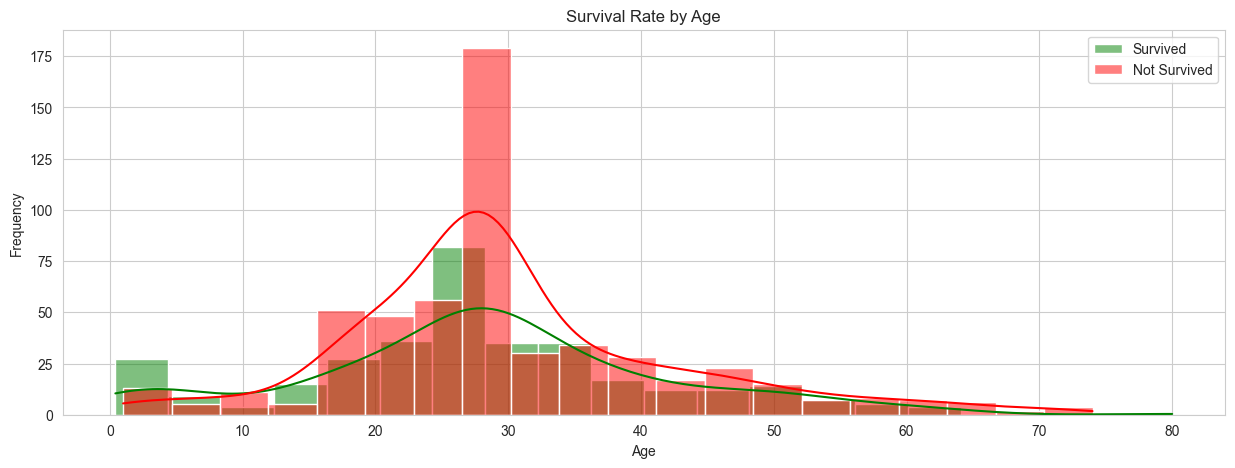

In [102]:
plt.figure(figsize=(15, 5))
sns.histplot(train_df[train_df['Survived'] == 1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(train_df[train_df['Survived'] == 0]['Age'], bins=20, kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()